<a href="https://colab.research.google.com/github/elizamelo/FisicaGeral/blob/main/100Resistores_470kOhms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
from scipy import stats


In [13]:

#Valor nominal ou do fabricante
R_ref= 470.0 #(kΩ)

In [14]:
##Exemplo: Medidas dos 100 resistores de 470 ± 5% (kΩ)
array_100 = [463,464,464,464,464,464,464,464,464,464,464,464,465,465,465,465,465,465,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,467,467,467,467,467,467,467,467,467,467,467,467,467,467,468,468,468,468,468,468,468,468,468,468,468,469,469,469,469,469,469,469,469,469,469,469,470,470,470,470,470,470,470,470,470,470,470,470,470,470,471,471,471,471,471,472,472,472,472,473,473,475,480]
#array_100 = [463,464,464,464,466,466,466,467,468,469,469,469,469,470,470,470,470,470,471,472,64,464,465,466,466,466,467,467,467,467,467,468,469,469,469,470,470,471,472,473,464,464,464,465,466,466,466,466,466,466,467,468,468,468,468,469,469,470,470,470,465,465,465,466,466,466,466,467,467,467,467,467,468,468,469,469,470,472,472,480,464,464,464,465,466,466,466,467,467,468,468,468,470,470,470,471,471,471,473,475]
array_GR01 = [463,464,464,464,466,466,466,467,468,469,469,469,469,470,470,470,470,470,471,472] #(k ohms)
array_GR02 = [464,464,465,466,466,466,467,467,467,467,467,468,469,469,469,470,470,471,472,473] #(k ohms)
array_GR03 = [464,464,464,465,466,466,466,466,466,466,467,468,468,468,468,469,469,470,470,470]
array_GR04 = [465,465,465,466,466,466,466,467,467,467,467,467,468,468,469,469,470,472,472,480]
array_GR05 = [464,464,464,465,466,466,466,467,467,468,468,468,470,470,470,471,471,471,473,475]
#array_100 = [854,854,865,869,875,883,896,801,895,896,800,803,806,809,811,822,816,827,817,821,826,830,831,829,830,841,836,847,840,838,860,853,848,842,844,849,846,849,850,853,856,855,858,853,857,863,857,863,861,863,872,855,863,863,874,869,881,874,881,885,874,872,872,879,873,878,879,876,878,882,878,876,881,888,884,879,883,884,885,885,886,897,893,899,801,888,898,802,899,893,888,895,813,892,893,897,895,898,889,895]
#array_GR01 = [854,854,865,869,875,883,896,801,895,896,800,803,806,809,811,822,816,827,817,821] #(k ohms)
#array_GR02 = [826,830,831,829,830,841,836,847,840,838,860,853,848,842,844,849,846,849,850,853] #(k ohms)
#array_GR03 = [856,855,858,853,857,863,857,863,861,863,872,855,863,863,874,869,881,874,881,885] #(k ohms)
#array_GR04 = [874,872,872,879,873,878,879,876,878,882,878,876,881,888,884,879,883,884,885,885] #(k ohms)
#array_GR05 = [886,897,893,899,801,888,898,802,899,893,888,895,813,892,893,897,895,898,889,895] #(k ohms)


In [15]:
def compatibilidade(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-np.mean(array_100))/ec
  if (d <= 2.0):
    print("Compatível", d, ec, abs(np.mean(grupo)-np.mean(array_100)))
  elif (d > 2.0 & d < 3.0):
    print("Inconclusivo", d,ec, abs(np.mean(grupo)-np.mean(array_100)))
  else:
    print("Incompatível", d,ec,abs(np.mean(grupo)-np.mean(array_100)))
  return(d)

In [16]:
def compatibilidadeRef(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  #egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  #ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-R_ref)/e100
  if d<=2.0:
    print("Compatível", d, e100, abs(np.mean(grupo)-R_ref))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,e100, abs(np.mean(grupo)-R_ref))
  else:
    print("Incompatível", d,e100,abs(np.mean(grupo)-R_ref))
  return(d)

Conjunto completo de valores de resistências (100):

In [17]:

amplitude_100=(np.max(array_100)-np.min(array_100))
print ( "Valor mínimo: {}".format( np.min(array_100) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_100) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_100 ) ,"(kΩ)")

Valor mínimo: 463 (kΩ)
Valor máximo: 480 (kΩ)
Amplitude: 17 (kΩ)


In [18]:
#Calculo da média
N100=len(array_100)
media_100=(np.sum(array_100)/N100)
vmin = np.min(array_100)
vmax = np.max(array_100)
print("média do conjunto de 100 resistores: {}".format( (media_100)),"(kΩ)")

média do conjunto de 100 resistores: 467.8 (kΩ)


In [19]:
#Usando o NumPy
np.mean( array_100 )

467.8

In [20]:
print("média do conjunto de 100 resistores: {}".format(np.mean( array_100 )),"(kΩ)")



média do conjunto de 100 resistores: 467.8 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Conjunto Completo de 100 Resistores')

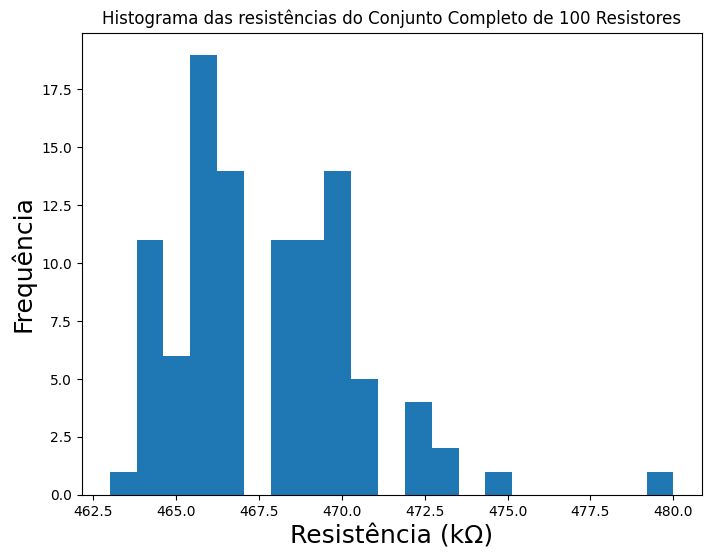

In [21]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_100, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Conjunto Completo de 100 Resistores', fontsize=12 )




Variância e desvio Padrão usando o NumPY:

In [66]:
var_100 = np.var( array_100, ddof=1 )
dp_100 = np.std( array_100, ddof=1 )
print ( "Variância do conj. de 100 resistores: {}".format(var_100),"(k^2Ω)" )
print ( "Desvio Padrao do conj. de 100 resistores: {}".format(np.sqrt(var_100)),"(kΩ)","pelo Numpy:",dp_100,"(kΩ)" )
sigma_m100 = np.std( array_100, ddof=1 )/np.sqrt(N100)
print ( "Erro da média do conj. de 100: {}".format(np.std( array_100, ddof=1 )/np.sqrt(N100)),"(kΩ)" )

Variância do conj. de 100 resistores: 7.676767676767675 (k^2Ω)
Desvio Padrao do conj. de 100 resistores: 2.7706980486454444 (kΩ) pelo Numpy: 2.7706980486454444 (kΩ)
Erro da média do conj. de 100: 0.27706980486454447 (kΩ)


Estimativa Padrão dos 100 resistores:

In [70]:
print ( "R100 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_100 ), 2 ), np.round( sigma_m100, 2 ) ) )


R100 = 467.8 ± 0.3 (kΩ)


Grupo 01 de valores de resistências:

In [24]:
amplitude_GR01=(np.max(array_GR01)-np.min(array_GR01))
print ( "Valor mínimo: {}".format( np.min(array_GR01) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR01) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR01 ) ,"(kΩ)")

Valor mínimo: 463 (kΩ)
Valor máximo: 472 (kΩ)
Amplitude: 9 (kΩ)


In [25]:
#Usando o NumPy
np.mean( array_GR01 )

467.85

In [26]:
#Calculo da média
N1_20=len(array_GR01)
media_GR01=(np.sum(array_GR01)/N1_20)
vmin = np.min(array_GR01)
vmax = np.max(array_GR01)

print("média do conjunto de 20 resistores do Grupo 01: {}".format( (media_GR01)),"(kΩ)")

média do conjunto de 20 resistores do Grupo 01: 467.85 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Grupo 01 de 20 Resistores')

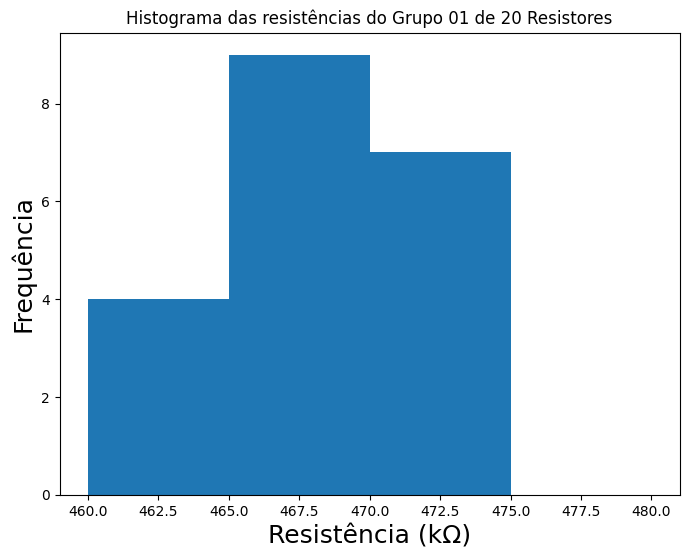

In [27]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR01, bins=4, range=(460,480))
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 01 de 20 Resistores', fontsize=12 )


In [28]:
var_gr1 = np.var( array_GR01, ddof=1 )
print ( "Variância do Grupo 01: {}".format(var_gr1), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 01: {}".format(np.sqrt(var_gr1)),"(kΩ)" )
sigma_m1 = np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)
print ( "Erro da média do Grupo 01: {}".format(np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)),"(kΩ)" )

Variância do Grupo 01: 7.081578947368421 (k^2Ω)
Desvio Padrao do do Grupo 01: 2.6611236249690506 (kΩ)
Erro da média do Grupo 01: 0.5950453321961454 (kΩ)


Estimativa Padrão GR01:

In [29]:
print ( "R1 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_GR01 ), 0 ), np.round( sigma_m1, 0 ) ) )


R1 = 468.0 ± 1.0 (kΩ)


Grupo 02 de valores de resistências:

In [30]:
#Calculo da média
N2_20=len(array_GR02)
media_GR02=(np.sum(array_GR02)/N2_20)
vmin = np.min(array_GR02)
vmax = np.max(array_GR02)
amplitude_GR02=(np.max(array_GR02)-np.min(array_GR02))
print ( "Valor mínimo: {}".format( np.min(array_GR02) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR02) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR02 ) ,"(kΩ)")
print("média do conjunto de 20 resistores do Grupo 02: {}".format( (media_GR02)),"(kΩ)")

Valor mínimo: 464 (kΩ)
Valor máximo: 473 (kΩ)
Amplitude: 9 (kΩ)
média do conjunto de 20 resistores do Grupo 02: 467.85 (kΩ)


In [31]:
#Usando o NumPy
np.mean( array_GR02 )

467.85

Text(0.5, 1.0, 'Histograma das resistências do Grupo 02 de 20 Resistores')

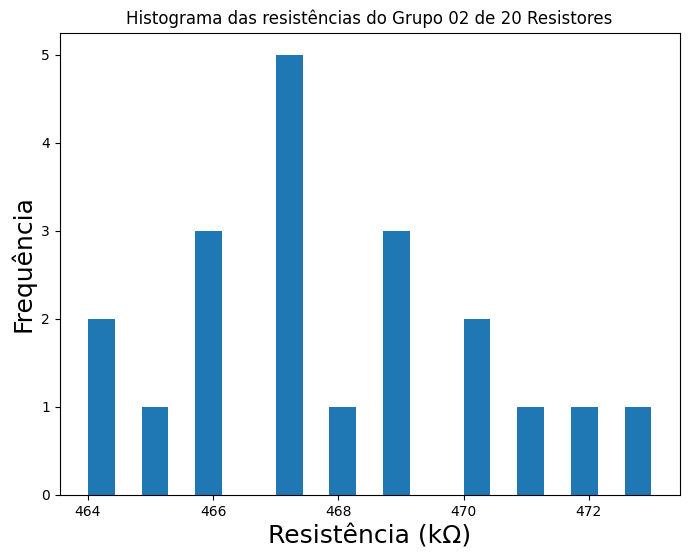

In [32]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR02, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 02 de 20 Resistores', fontsize=12 )


In [33]:
var_gr2 = np.var( array_GR02, ddof=1 )
print ( "Variância do Grupo 02: {}".format(var_gr2), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 02: {}".format(np.sqrt(var_gr2)),"(kΩ)" )
sigma_m2 = np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)
print ( "Erro da média do Grupo 02: {}".format(np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)),"(kΩ)" )

Variância do Grupo 02: 6.239473684210526 (k^2Ω)
Desvio Padrao do do Grupo 02: 2.497893849668261 (kΩ)
Erro da média do Grupo 02: 0.5585460448436872 (kΩ)


Estimativa Padrão GR02:

In [34]:
print ( "R2 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR02 ), 0 ), np.round( sigma_m2, 0 ) ) )


R2 = 468 ± 1 (kΩ)


Grupo 03 de valores de resistências:

In [35]:
#Calculo da média
N3_20=len(array_GR03)
media_GR03=(np.sum(array_GR03)/N3_20)
vmin = np.min(array_GR03)
vmax = np.max(array_GR03)
amplitude_GR03=(np.max(array_GR03)-np.min(array_GR03))
print ( "Valor mínimo: {}".format( np.min(array_GR03) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR03) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR03 ),"(kΩ)" )
print("média do conjunto de 20 resistores do Grupo 03: {}".format( (media_GR03)),"(kΩ)")

Valor mínimo: 464 (kΩ)
Valor máximo: 470 (kΩ)
Amplitude: 6 (kΩ)
média do conjunto de 20 resistores do Grupo 03: 467.0 (kΩ)


In [36]:
#Usando o NumPy
np.mean( array_GR03 )

467.0

Text(0.5, 1.0, 'Histograma das resistências do Grupo 03 de 20 Resistores')

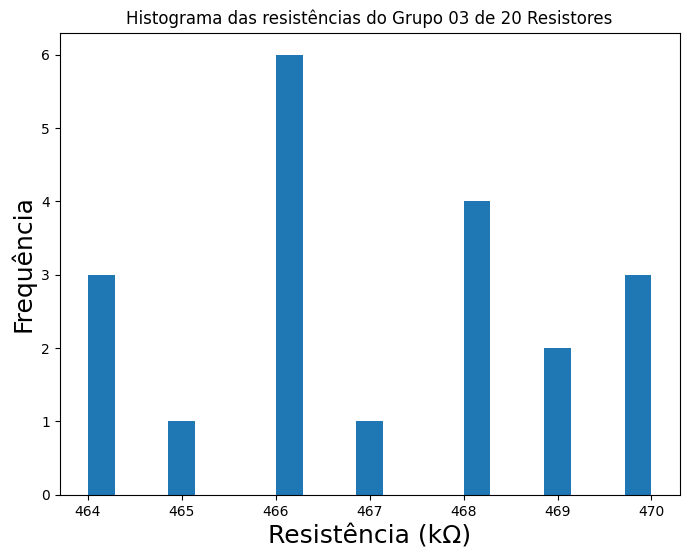

In [37]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR03, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 03 de 20 Resistores', fontsize=12 )


In [38]:
var_gr3 = np.var( array_GR03, ddof=1 )
print ( "Variância do Grupo 03: {}".format(var_gr3), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 03: {}".format(np.sqrt(var_gr3)),"(kΩ)" )
sigma_m3 = np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)
print ( "Erro da média do Grupo 03: {}".format(np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)),"(kΩ)" )

Variância do Grupo 03: 4.0 (k^2Ω)
Desvio Padrao do do Grupo 03: 2.0 (kΩ)
Erro da média do Grupo 03: 0.4472135954999579 (kΩ)


Estimativa Padrão GR03:

In [39]:
print ( "R3 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_GR03 ), 1 ), np.round( sigma_m3, 1 ) ) )


R3 = 467.0 ± 0.4 (kΩ)


Grupo 04 de valores de resistências:

In [40]:
#Calculo da média
N4_20=len(array_GR04)
media_GR04=(np.sum(array_GR04)/N4_20)
vmin = np.min(array_GR04)
vmax = np.max(array_GR04)
amplitude_GR04=(np.max(array_GR04)-np.min(array_GR04))
print ( "Valor mínimo: {}".format( np.min(array_GR04) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR04) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR04 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 04: {}".format( (media_GR04)),"(kΩ)")

Valor mínimo: 465 (kΩ)
Valor máximo: 480 (kΩ)
Amplitude: 15 (kΩ)
média do conjunto de 20 resistências do Grupo 04: 468.1 (kΩ)


In [41]:
#Usando o NumPy
np.mean( array_GR04 )

468.1

Text(0.5, 1.0, 'Histograma das resistências do Grupo 04 de 20 Resistores')

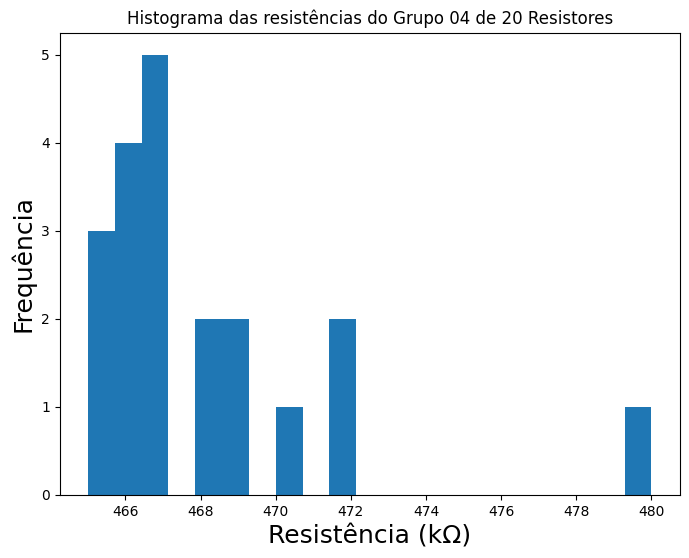

In [42]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR04, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 04 de 20 Resistores', fontsize=12 )


In [43]:
var_gr4 = np.var( array_GR04, ddof=1 )
print ( "Variância do Grupo 04: {}".format(var_gr4), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 04: {}".format(np.sqrt(var_gr4)),"(kΩ)" )
sigma_m4 = np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)
print ( "Erro da média do Grupo 04: {}".format(np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)),"(kΩ)" )

Variância do Grupo 04: 12.094736842105263 (k^2Ω)
Desvio Padrao do do Grupo 04: 3.477748818144471 (kΩ)
Erro da média do Grupo 04: 0.7776482766040591 (kΩ)


Estimativa Padrão GR04:

In [44]:
print ( "R4 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_GR04 ), 1 ), np.round( sigma_m4, 1 ) ) )


R4 = 468.1 ± 0.8 (kΩ)


Grupo 05 de valores de resistências:


In [45]:
#Calculo da média
N5_20=len(array_GR05)
media_GR05=(np.sum(array_GR05)/N5_20)
vmin = np.min(array_GR05)
vmax = np.max(array_GR05)
amplitude_GR05=(np.max(array_GR05)-np.min(array_GR05))
print ( "Valor mínimo: {}".format( np.min(array_GR05) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR05) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR05 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 05: {}".format( (media_GR05)),"(kΩ)")

Valor mínimo: 464 (kΩ)
Valor máximo: 475 (kΩ)
Amplitude: 11 (kΩ)
média do conjunto de 20 resistências do Grupo 05: 468.2 (kΩ)


In [46]:
#Usando o NumPy
np.mean( array_GR05 )

468.2

Text(0.5, 1.0, 'Histograma das resistências do Grupo 05 de 20 Resistores')

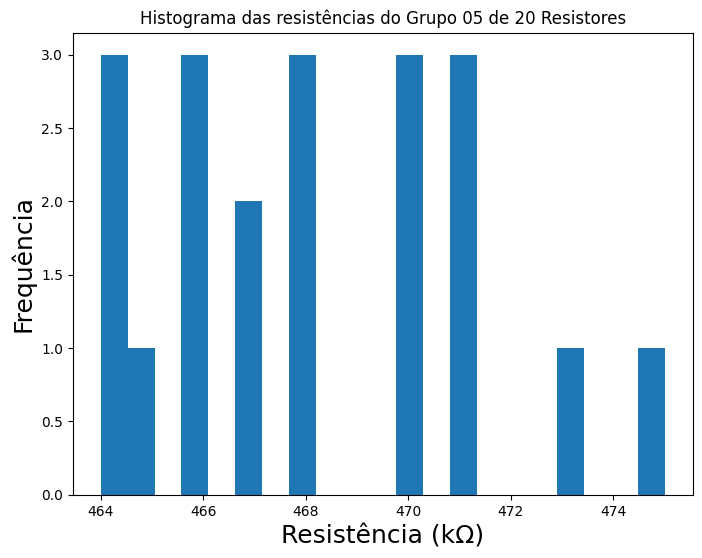

In [47]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR05, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 05 de 20 Resistores', fontsize=12 )

In [48]:
var_gr5 = np.var( array_GR05, ddof=1 )
print ( "Variância do Grupo 05: {}".format(var_gr5), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 05: {}".format(np.sqrt(var_gr5)),"(kΩ)" )
sigma_m5 = np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)
print ( "Erro da média do Grupo 05: {}".format(np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)),"(kΩ)" )

Variância do Grupo 05: 9.642105263157895 (k^2Ω)
Desvio Padrao do do Grupo 05: 3.1051739505473592 (kΩ)
Erro da média do Grupo 05: 0.6943380035385465 (kΩ)


Estimativa Padrão GR05:


In [49]:
print ( "R5 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_GR05 ), 1 ), np.round( sigma_m5, 1 ) ) )


R5 = 468.2 ± 0.7 (kΩ)


Média das Médias:

In [50]:
array_GRM = [np.mean( array_GR01 ),np.mean( array_GR02 ),np.mean( array_GR03 ),np.mean( array_GR04),np.mean( array_GR05)] #kΩ

In [51]:
N=len(array_GRM)
media_GRM=(np.sum(array_GRM)/N)
vmin = np.min(array_GRM)
vmax = np.max(array_GRM)
amplitude_GRM=(np.max(array_GRM)-np.min(array_GRM))
print ( "Valor mínimo: {}".format( np.min(array_GRM) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GRM) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GRM ),"(kΩ)" )
print("média do conjunto das médias das resistências: {}".format( (media_GRM)),"(kΩ)")

Valor mínimo: 467.0 (kΩ)
Valor máximo: 468.2 (kΩ)
Amplitude: 1.1999999999999886 (kΩ)
média do conjunto das médias das resistências: 467.8 (kΩ)


In [52]:
#Usando o NumPy
np.mean( array_GRM )

467.8

Text(0.5, 1.0, 'Histograma das resistências do grupo das médias')

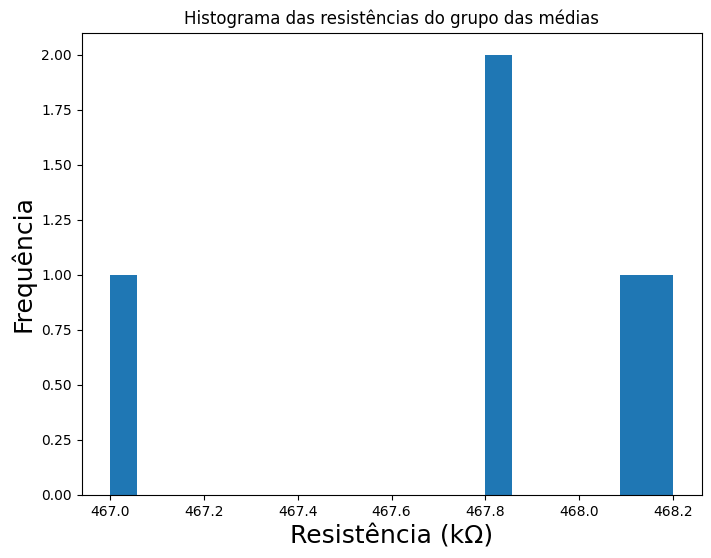

In [53]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GRM, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do grupo das médias', fontsize=12 )

In [54]:
var_grm = np.var( array_GRM, ddof=1 )
print ( "Variância do Grupo das médias: {}".format(var_grm), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo das médias: {}".format(np.sqrt(var_grm)),"(kΩ)" )
sigma_m = np.std( array_GRM, ddof=1 )/np.sqrt(N)
print ( "Erro da média do Grupo das médias: {}".format(np.std( array_GRM, ddof=1 )/np.sqrt(N)),"(kΩ)" )

Variância do Grupo das médias: 0.22375000000000228 (k^2Ω)
Desvio Padrao do do Grupo das médias: 0.4730221982106149 (kΩ)
Erro da média do Grupo das médias: 0.21154195801306286 (kΩ)


Estimativa padrão do grupo das médias:

In [55]:
print ( "RM = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GRM ), 1 ), np.round( sigma_m, 1 ) ) )


RM = 468 ± 0 (kΩ)


Desvio Padrão do conjunto com 100 resistores:


In [56]:
sigma_L_p = np.std( array_100, ddof=0 )
print ( "Desvio padrão populacional (kΩ) = {}".format(sigma_L_p  ) )

sigma_L_a = np.std( array_100, ddof=1 )
print ( "Desvio padrão amostral (kΩ) = {}".format(sigma_L_a  ) )



Desvio padrão populacional (kΩ) = 2.7568097504180438
Desvio padrão amostral (kΩ) = 2.7706980486454444


Erro Relativo:

In [57]:
erro_relativo100 = sigma_m100 / media_100
print ( "Erro relativo das medidas dos 100 resistores = {}".format( erro_relativo100 ),"(kΩ)" )
erro_relativo1 = sigma_m1/ media_GR01
print ( "Erro relativo das medidas do grupo 1 = {}".format( erro_relativo1 ),"(kΩ)" )
erro_relativo2 = sigma_m2/ media_GR02
print ( "Erro relativo das medidas do grupo 2 = {}".format( erro_relativo2 ),"(kΩ)" )
erro_relativo3 = sigma_m3/ media_GR03
print ( "Erro relativo das medidas do grupo 3 = {}".format( erro_relativo3 ),"(kΩ)" )
erro_relativo4 = sigma_m4/ media_GR04
print ( "Erro relativo das medidas do grupo 4 = {}".format( erro_relativo4 ),"(kΩ)" )
erro_relativo5 = sigma_m5/ media_GR05
print ( "Erro relativo das medidas do grupo 5 = {}".format( erro_relativo5 ),"(kΩ)" )
erro_relativoM = sigma_m/ media_GRM
print ( "Erro relativo das medidas do grupo das médias = {}".format( erro_relativoM ),"(kΩ)" )

Erro relativo das medidas dos 100 resistores = 0.0005922826098002233 (kΩ)
Erro relativo das medidas do grupo 1 = 0.0012718720363281936 (kΩ)
Erro relativo das medidas do grupo 2 = 0.0011938571013010307 (kΩ)
Erro relativo das medidas do grupo 3 = 0.0009576308254817086 (kΩ)
Erro relativo das medidas do grupo 4 = 0.0016612866408973704 (kΩ)
Erro relativo das medidas do grupo 5 = 0.0014829944543753662 (kΩ)
Erro relativo das medidas do grupo das médias = 0.0004522059812164661 (kΩ)


Razão entre os erros das médias de cada grupo e o erro da média do conjunto completo:

In [58]:
erro_r1 = sigma_m1/sigma_m100 
print ( "Razão do sigma_m1/sigma_m100   = {}".format( np.round(erro_r1 ),2) )

erro_r2 = sigma_m2/sigma_m100  
print ( "Razão do sigma_m2/sigma_m100   = {}".format( np.round(erro_r2 ) ,2))

erro_r3 = sigma_m3/sigma_m100 
print ( "Razão do sigma_m3/sigma_m100   = {}".format(np.round( erro_r3 ),2 ))

erro_r4 = sigma_m4/sigma_m100 
print ( "Razão do sigma_m4/sigma_m100   = {}".format( erro_r4 ) )

erro_r5 = sigma_m5/sigma_m100 
print ( "Razão do sigma_m5/sigma_m100   = {}".format( np.round(erro_r5 ),2) )

Razão do sigma_m1/sigma_m100   = 2.0
Razão do sigma_m2/sigma_m100   = 2.0
Razão do sigma_m3/sigma_m100   = 2.0
Razão do sigma_m4/sigma_m100   = 2.8066872064396926
Razão do sigma_m5/sigma_m100   = 3.0


In [59]:
print("O grupo de 100 é ou não compatível com o R de ref.:",compatibilidadeRef(array_100))

Incompatível 7.980238751210089 0.2756809750418044 2.1999999999999886
O grupo de 100 é ou não compatível com o R de ref.: 7.980238751210089


In [60]:
print("O grupo 01 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR01))

Compatível 0.0762422865016321 0.6558040464715211 0.05000000000001137
O grupo 01 é  ou não compatível com o grupo de 100: 0.0762422865016321


In [61]:
print("O grupo 02 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR02))

Compatível 0.08027288465174844 0.6228753360107673 0.05000000000001137
O grupo 02 é  ou não compatível com o grupo de 100: 0.08027288465174844


In [62]:
print("O grupo 03 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR03))

Compatível 1.5227739752537839 0.5253570214625478 0.8000000000000114
O grupo 03 é  ou não compatível com o grupo de 100: 1.5227739752537839


In [63]:
print("O grupo 04 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR04))

Compatível 0.3636064904720714 0.8250677803097533 0.30000000000001137
O grupo 04 é  ou não compatível com o grupo de 100: 0.3636064904720714


In [64]:
print("O grupo 05 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR05))

Compatível 0.5354290523372142 0.7470644303926499 0.39999999999997726
O grupo 05 é  ou não compatível com o grupo de 100: 0.5354290523372142
